# Assignment 2 Notebook 

## Oscar Chivers, 190012624

GitHub username: OscarChivers

GitHub URL: 

Assignment URL: 

Google Drive for data: 


To download the data, please click on the google drive link, and all the data needed for this lab is in there. You will need to download them to a file and then run the code. You may have to change the paths when calling the files but if you put the data in a file with the following path 'data/Assignment/...' then you will not need to do this. 

Some of the maps that are coded do not come up in the printed version. However when you run the code they will appear. Regardless, the maps that are the final maps are all pasted as images so they will be present.

# Lab 5 Challenges

## Challenge 1

## Challenge 2

# Lab 6 Challenges

## Challenge 1

In this challenge, you will replicate the process of creating a geodemographic classification using the k-means clustering algorithm. Please select any city in the UK except London, Liverpool, or Glasgow. The main goal is to generate a meaningful and informative classification that captures the diversity of areas in your dataset using the census data ( For England, you can try to use the 2021 or 2011 census, and for Scotland, you need to use the 2011 census data) 

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.
3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 
4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.
7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?
10. Map the final cluster groups
11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.
12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

1. Define the main goal for the geodemographic classification (marketing, retail and service planning).
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.

Geodemographic classification is a method of grouping geogrpahical neighbourhoods that are based on similar characteristics. They can be used for marketing so that different companies may know more about where their proudcts should be placed. Such as young adults who may be thinkning about having children, geodemographic classification can show that there are more people living in these areas therefore marketing and retail should be placed more in these areas. Or if there are areas that have more old people, who tend to require more healthcare services, geodemographic classification can help show areas that may be of importance 

In my geodemographic classification, I will try and how socio-deomgraphic and economic factors are shown in different classifications in Edinburgh. It will focus on the different education, economic and housing characteristics are classified in Edinburgh. This will be useful as it may help with service allocation, such as providing increasing funcing to schools or hospitals in a certain area. It may also help to determine demographics of certain areas like the life stages of people and this will help with marketing products to certaini demographies - such as those who may be looking to purchase a house, or even those who are looking to have children. 

3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 

These are the following topics that I think will be useful for the my geodemographic classification. 

* KS102SC - Age structure - Demographics 
* QS104SC - Sex - Demographics 
* QS501SC - Highest level of qualification - Education 
* QS302SC - General Health - Health 
* QS301SCb - Provision of unpaid care - Health/Economic
* KS601SC - Economic activity - Economic 
* KS604SCa - Hours worked - Economic
* QS703SC - Distance travelled to work - Economic
* QS405SC - Tenure - Housing
* QS118SC - Families with dependent children - Housing

The OA census attributes were downloaded through the following link [OA Census Data](https://www.scotlandscensus.gov.uk/documents/2011-census-table-data-output-area-2011/). The boundary for the city of Edinburgh was downloaded through the following link [OA Boundaries](https://borders.ukdataservice.ac.uk/bds.html)

I am now going to load the data (csv's) into the notebook and merge them together. 

To do this I need to make a directory for where all the CSVs can be found, then make an empty pandas dataframe. Then join the csvs and make a dataframe containig all of them. 

I had to do some editing of the CSVs before they could be merged, some of them had explanations of what data was in the CSV and this had to be deleted as it meant that they could not be merged. 

In [4]:
import pandas as pd
import os

csv_directory = "data/census_raw/"

# We need a list of all CSV files in the folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# An empty DataFrame to store the merged dat
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) # We create a consistent path
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    # Concatenate/Merge all columns, there is a pitfall here, you will get a duplicate oa_code from all csv files.
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset. You might want to do some pre-processing.
merged_data.to_csv("data/merged_census_data.csv", index=False)
# Be aware of the mixted dtype you are importing we unfortunatly have to deal with that later.
# eventually you can avoid this to define the dtype on import method.

I am now going to clip the merged census data to the shapefile of City of Edinburgh, this is so that the dataset is more managable, I am going to save the merged data to a file so that I do not need to do these two lines of code above and below each time that i run the code. However if this is the first time that you are running the code, then you will need to run these cells!

In [5]:
import pandas as pd
import geopandas as gpd

shp_path = "data/scotland_oa_2011.shp"
gdf = gpd.read_file(shp_path)

csv_path = "data/merged_census_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

# Merge the GeoDataFrame with the DataFrame based on the oa_code
merged_data = gdf.merge(csv_data, left_on='code', right_on='oa_code', how='left')

# You could save the merged data to a new shapefile, but I will skip this now
# but you could do it, in case you need just to read the data you have merged., and avoid
# the previous cell
#merged_data.to_file('data/edin_census_data.shp', index=False)

C:\Users\oscar\AppData\Local\Temp\ipykernel_33664\3535829705.py:16: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_data.to_file('data/edin_census_data.shp', index=False)


If you have saved the data to a shapefile then you can run the following code to read the shapefile in as merged_data, if this is your first time running the code, you do not need to uncomment the code!

In [6]:
#merged_data = gpd.read_file('data/edin_census_data.shp')

I am now going to inspect the whole of the merged data and then decide which variables to continue my analysis with, so that I can show how there are different categories in my geodemographic classification. 

In [8]:
list(merged_data.columns)

['objectid',
 'code',
 'hhcount',
 'popcount',
 'council',
 'sqkm',
 'hect',
 'masterpc',
 'easting',
 'northing',
 'shape_1_le',
 'shape_1_ar',
 'label',
 'name',
 'geometry',
 'oa_code',
 'All people',
 '0 to 4',
 '5 to 7',
 '8 to 9',
 '10 to 14',
 '15',
 '16 to 17',
 '18 to 19',
 '20 to 24',
 '25 to 29',
 '30 to 44',
 '45 to 59',
 '60 to 64',
 '65 to 74',
 '75 to 84',
 '85 to 89',
 '90 and over',
 'Mean age',
 'Median age',
 'oa_code.1',
 'All people aged 16 to 74',
 'Economically active: Employee: Part-time',
 'Economically active: Employee: Full-time',
 'Economically active: Self-employed',
 'Economically active: Unemployed',
 'Economically active: Full-time student',
 'Economically inactive: Retired',
 'Economically inactive: Student',
 'Economically inactive: Looking after home or family',
 'Economically inactive: Long-term sick or disabled',
 'Economically inactive: Other',
 'Unemployed people aged 16 to 74: Aged 16 to 24',
 'Unemployed people aged 16 to 74: Aged 50 to 74',
 'U

In [9]:
merged_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Columns: 132 entries, objectid to Other (2)
dtypes: float64(6), geometry(1), int64(3), object(122)
memory usage: 4.4+ MB


In [10]:
merged_data.shape

(4322, 132)

In [11]:
merged_data.head()

objectid       code  hhcount  popcount    council       sqkm         hect  \
0      7324  S00106438       65       151  S12000036   0.037986     3.798556   
1     16098  S00105168       56        85  S12000036   0.002870     0.286985   
2     18811  S00104758       32        66  S12000036   0.001676     0.167614   
3     15991  S00106865       48       133  S12000036  10.147070  1014.707020   
4     17596  S00106064       50       100  S12000036   0.010604     1.060360   

   masterpc easting northing  ...  Work mainly at or from home  Less than 2km  \
0  EH28 8SU  311939   672588  ...                            8             14   
1  EH11 1JH  324213   672474  ...                            4             12   
2   EH9 1PE  325957   672335  ...                            2              7   
3  EH14 7JD  314377   665609  ...                           16              2   
4  EH15 2NA  331564   673116  ...                            4              -   

  2km to less than 5km 5km to less than 10km 10km to less than 20km  \
0                    5                    24                     24   
1                   18                     6                      2   
2                   10                     3                      2   
3                    4                    14                     18   
4                    2                    13                      3   

  20km to less than 30km 30km to less than 40km 40km to less than 60km  \
0                      -                      1                      -   
1                      4                      -                      -   
2                      2                      2                      -   
3                      -                      -                      2   
4                      -                      1                      -   

  60km and over Other (2)  
0             -         7  
1             2         2  
2             -         1  
3             2         9  
4             2         2  

[5 rows x 132 columns]

I need to select some columns from the many different variables that I have. Therefore I am going to look at some variables in more depth to see their distribution and if there is anything interesting that is worth putting in my geodemographics analysis

4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.

In [18]:
# summary statistics
merged_data['Work mainly at or from home'].describe()

count     4322
unique      27
top          3
freq       574
Name: Work mainly at or from home, dtype: object

In [19]:
merged_data['Economically active: Employee: Full-time'].describe()

count     4322
unique      92
top         33
freq       141
Name: Economically active: Employee: Full-time, dtype: object

In [30]:
merged_data['One dependent child in family aged 0 to 4'].describe()

count    3538.000000
mean        2.800735
std         1.974141
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        17.000000
Name: One dependent child in family aged 0 to 4, dtype: float64

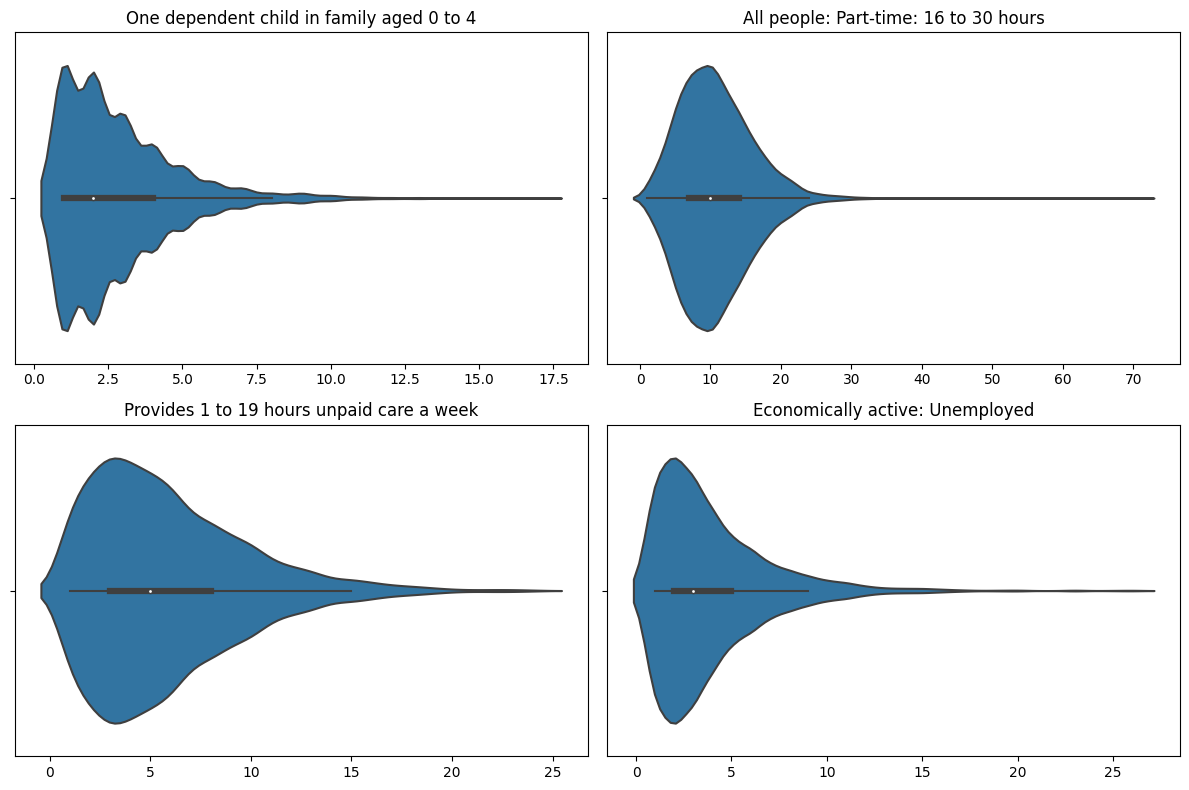

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['One dependent child in family aged 0 to 4',
                      'All people: Part-time: 16 to 30 hours',
                      'Provides 1 to 19 hours unpaid care a week',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    merged_data[attribute] = pd.to_numeric(merged_data[attribute], errors='coerce')
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oscar\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

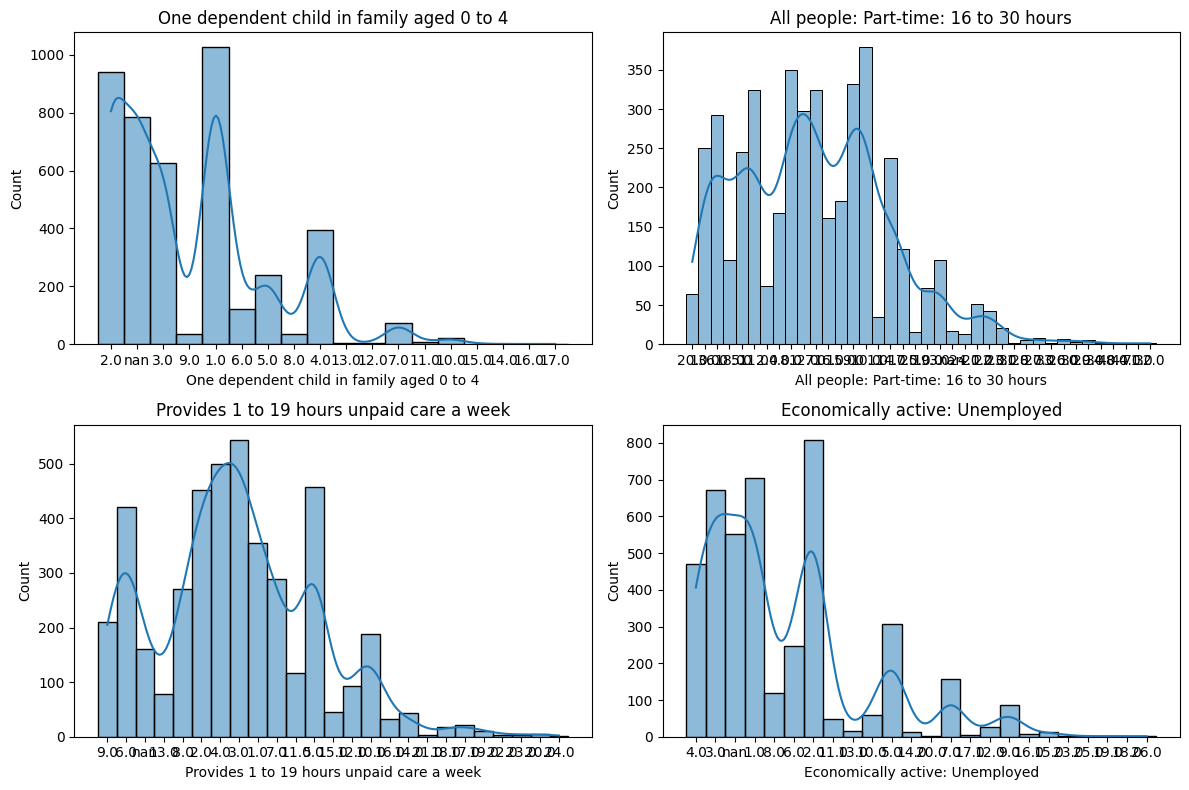

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['One dependent child in family aged 0 to 4',
                      'All people: Part-time: 16 to 30 hours',
                      'Provides 1 to 19 hours unpaid care a week',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

I am going to select variables that are related to the different aspects of my census data. Various variables will be used that relate to the following aspects of the census data: 

* Age range
* Employment
* Sex
* Dependent children in the family
* Unpaid care provided
* General Health
* Housing status 
* Education level
* Distance travelled for work

I hope that these variables selected will show the different classifications will show if are areas where certain demographies have to travel further for work, if the economics and education are different and if there are different levels of healthcare, in terms of their own health and those who they have to give care to. It will also show if there are various housing categories in Edinburgh. 

I have selected the data and will have to check for association between the variables. But there is also bias in the results of the geodemographic classification. This is because I have selected the 19 variables I want to analyse, therefore the results may be skewed towards showing classifications regarding the health, housing and economics of the City of Edinburgh. Whereas it must be noted that this is not a perfect classification and there are many other geodemographic categorisations possible. 

The next code will subset the 19 variables I have selected, and it will make them into a percentage, to standardise the, between ateas. This is to account for larger OAs where there will be higher counts of things. 

It is important to note that I have used different denominators depeneding on what teh variable is. I  know which demoninator is through looking at the data list of merged_data. The denominator is under each oa_code. It is important that they go with the asssociated data. 

5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.

In [41]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # The data have several empty values, so you need to process them, forcing them to be a numeric or NaN value
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding totals.
total_cols = ['All people','All people',
              'All people aged 16 to 74','All people aged 16 to 74', 'All people aged 16 to 74',
              'All people aged 16 to 74 in employment',
              'All people.1',
              'All families in households','All families in households',
              'All people.2','All people.2',
              'All people.3','All people.3',
              'All households','All households','All households',
              'All people aged 16 and over',
              'All people aged 16 to 74 in employment.1','All people aged 16 to 74 in employment.1' ]
# List of the corresponding values. 
value_cols = ['30 to 44',
              '65 to 74',
              'Economically active: Employee: Full-time',
              'Economically active: Unemployed',
              'Economically active: Full-time student',
              'All people: Part-time: 16 to 30 hours',
              'Males',
              'No dependent children in family',
              'One dependent child in family aged 0 to 4',
              'Provides no unpaid care',
              'Provides 1 to 19 hours unpaid care a week',
              'Good health',
              'Bad health',
              'Owned',
              'Social rented',
              'Private rented',
              'All people aged 16 and over: Level 4 and above',
              'Work mainly at or from home', 
              '5km to less than 10km']

# Later we migth need to rename those columns., for now is ok...
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

# but what's important is you are aware of the correct total as dominator, census data can be very tricky

In [42]:
result_dataframe.head()

30 to 44_percentage  65 to 74_percentage  \
0            13.245033             8.609272   
1            24.705882             1.176471   
2            22.727273             1.515152   
3            20.300752             9.774436   
4            16.000000            17.000000   

   Economically active: Employee: Full-time_percentage  \
0                                          48.695652     
1                                          45.000000     
2                                          41.269841     
3                                          35.294118     
4                                          22.727273     

   Economically active: Unemployed_percentage  \
0                                    3.478261   
1                                    3.750000   
2                                    4.761905   
3                                         NaN   
4                                    4.545455   

   Economically active: Full-time student_percentage  \
0                                                NaN   
1                                           7.500000   
2                                          15.873016   
3                                           6.862745   
4                                           4.545455   

   All people: Part-time: 16 to 30 hours_percentage  Males_percentage  \
0                                         24.096386         52.317881   
1                                         23.214286         45.882353   
2                                         15.789474         51.515152   
3                                         25.000000         54.887218   
4                                         16.666667         45.000000   

   No dependent children in family_percentage  \
0                                   65.957447   
1                                   94.736842   
2                                   80.000000   
3                                   52.500000   
4                                   54.545455   

   One dependent child in family aged 0 to 4_percentage  \
0                                           4.255319      
1                                                NaN      
2                                          20.000000      
3                                           7.500000      
4                                                NaN      

   Provides no unpaid care_percentage  \
0                           87.417219   
1                           89.411765   
2                          100.000000   
3                           87.218045   
4                           90.000000   

   Provides 1 to 19 hours unpaid care a week_percentage  \
0                                           5.960265      
1                                           7.058824      
2                                                NaN      
3                                           9.774436      
4                                           8.000000      

   Good health_percentage  Bad health_percentage  Owned_percentage  \
0               25.827815               5.960265         72.307692   
1               21.176471               4.705882         44.642857   
2               25.757576                    NaN         40.625000   
3               15.037594               1.503759         52.083333   
4               18.000000               5.000000         30.000000   

   Social rented_percentage  Private rented_percentage  \
0                 20.000000                   6.153846   
1                  7.142857                  46.428571   
2                       NaN                  50.000000   
3                  2.083333                  29.166667   
4                 66.000000                   4.000000   

   All people aged 16 and over: Level 4 and above_percentage  \
0                                          16.535433           
1                                          60.000000           
2                                          57.812500           
3                     

In [43]:
result_dataframe.shape

(4322, 19)

In [44]:
# Concatenate the resulting tables.
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

objectid       code  hhcount  popcount    council       sqkm         hect  \
0      7324  S00106438       65       151  S12000036   0.037986     3.798556   
1     16098  S00105168       56        85  S12000036   0.002870     0.286985   
2     18811  S00104758       32        66  S12000036   0.001676     0.167614   
3     15991  S00106865       48       133  S12000036  10.147070  1014.707020   
4     17596  S00106064       50       100  S12000036   0.010604     1.060360   

   masterpc easting northing  ...  Provides no unpaid care_percentage  \
0  EH28 8SU  311939   672588  ...                           87.417219   
1  EH11 1JH  324213   672474  ...                           89.411765   
2   EH9 1PE  325957   672335  ...                          100.000000   
3  EH14 7JD  314377   665609  ...                           87.218045   
4  EH15 2NA  331564   673116  ...                           90.000000   

   Provides 1 to 19 hours unpaid care a week_percentage  \
0                                           5.960265      
1                                           7.058824      
2                                                NaN      
3                                           9.774436      
4                                           8.000000      

  Good health_percentage Bad health_percentage Owned_percentage  \
0              25.827815              5.960265        72.307692   
1              21.176471              4.705882        44.642857   
2              25.757576                   NaN        40.625000   
3              15.037594              1.503759        52.083333   
4              18.000000              5.000000        30.000000   

  Social rented_percentage  Private rented_percentage  \
0                20.000000                   6.153846   
1                 7.142857                  46.428571   
2                      NaN                  50.000000   
3                 2.083333                  29.166667   
4                66.000000                   4.000000   

  All people aged 16 and over: Level 4 and above_percentage  \
0                                          16.535433          
1                                          60.000000          
2                                          57.812500          
3                                          40.000000          
4                                          44.444444          

  Work mainly at or from home_percentage 5km to less than 10km_percentage  
0                               9.638554                        28.915663  
1                               8.000000                        12.000000  
2                               6.896552                        10.344828  
3                              23.880597                        20.895522  
4                              14.814815                        48.148148  

[5 rows x 151 columns]

In [45]:
list(concatenated_df.columns)

['objectid',
 'code',
 'hhcount',
 'popcount',
 'council',
 'sqkm',
 'hect',
 'masterpc',
 'easting',
 'northing',
 'shape_1_le',
 'shape_1_ar',
 'label',
 'name',
 'geometry',
 'oa_code',
 'All people',
 '0 to 4',
 '5 to 7',
 '8 to 9',
 '10 to 14',
 '15',
 '16 to 17',
 '18 to 19',
 '20 to 24',
 '25 to 29',
 '30 to 44',
 '45 to 59',
 '60 to 64',
 '65 to 74',
 '75 to 84',
 '85 to 89',
 '90 and over',
 'Mean age',
 'Median age',
 'oa_code.1',
 'All people aged 16 to 74',
 'Economically active: Employee: Part-time',
 'Economically active: Employee: Full-time',
 'Economically active: Self-employed',
 'Economically active: Unemployed',
 'Economically active: Full-time student',
 'Economically inactive: Retired',
 'Economically inactive: Student',
 'Economically inactive: Looking after home or family',
 'Economically inactive: Long-term sick or disabled',
 'Economically inactive: Other',
 'Unemployed people aged 16 to 74: Aged 16 to 24',
 'Unemployed people aged 16 to 74: Aged 50 to 74',
 'U

I now have a dataframe which has the columns with percentages - which is what I want for the analysis, and I have combined it with the original dataframe, which has the geometries, which I need for the geodemographic analysis. So I am now going to subset the data which is in a percentage and also subset the geometries, code, popcount and any other variables that may be important. 

In [46]:
keep_cols= [
    'code',
    'popcount',
    'hhcount',
    'geometry',
    '30 to 44_percentage',
    '65 to 74_percentage', 
    'Economically active: Employee: Full-time_percentage', 
    'Economically active: Unemployed_percentage', 
    'Economically active: Full-time student_percentage',
    'All people: Part-time: 16 to 30 hours_percentage',
    'Males_percentage',
    'No dependent children in family_percentage',
    'One dependent child in family aged 0 to 4_percentage',
    'Provides no unpaid care_percentage',
    'Provides 1 to 19 hours unpaid care a week_percentage',
    'Good health_percentage',
    'Bad health_percentage',
    'Owned_percentage',
    'Social rented_percentage',
    'Private rented_percentage',
    'All people aged 16 and over: Level 4 and above_percentage',
    'Work mainly at or from home_percentage',
    '5km to less than 10km_percentage']

edin_census_data = concatenated_df[keep_cols]

In [47]:
edin_census_data.head()

code  popcount  hhcount  \
0  S00106438       151       65   
1  S00105168        85       56   
2  S00104758        66       32   
3  S00106865       133       48   
4  S00106064       100       50   

                                            geometry  30 to 44_percentage  \
0  POLYGON ((312053.000 672642.000, 312066.000 67...            13.245033   
1  POLYGON ((324246.744 672500.389, 324261.290 67...            24.705882   
2  POLYGON ((325970.413 672363.682, 325972.882 67...            22.727273   
3  POLYGON ((315157.369 666212.846, 315173.727 66...            20.300752   
4  POLYGON ((331506.489 673162.694, 331671.000 67...            16.000000   

   65 to 74_percentage  Economically active: Employee: Full-time_percentage  \
0             8.609272                                          48.695652     
1             1.176471                                          45.000000     
2             1.515152                                          41.269841     
3             9.774436                                          35.294118     
4            17.000000                                          22.727273     

   Economically active: Unemployed_percentage  \
0                                    3.478261   
1                                    3.750000   
2                                    4.761905   
3                                         NaN   
4                                    4.545455   

   Economically active: Full-time student_percentage  \
0                                                NaN   
1                                           7.500000   
2                                          15.873016   
3                                           6.862745   
4                                           4.545455   

   All people: Part-time: 16 to 30 hours_percentage  ...  \
0                                         24.096386  ...   
1                                         23.214286  ...   
2                                         15.789474  ...   
3                                         25.000000  ...   
4                                         16.666667  ...   

   Provides no unpaid care_percentage  \
0                           87.417219   
1                           89.411765   
2                          100.000000   
3                           87.218045   
4                           90.000000   

   Provides 1 to 19 hours unpaid care a week_percentage  \
0                                           5.960265      
1                                           7.058824      
2                                                NaN      
3                                           9.774436      
4                                           8.000000      

   Good health_percentage  Bad health_percentage  Owned_percentage  \
0               25.827815               5.960265         72.307692   
1               21.176471               4.705882         44.642857   
2               25.757576                    NaN         40.625000   
3               15.037594               1.503759         52.083333   
4               18.000000               5.000000         30.000000   

   Social rented_percentage  Private rented_percentage  \
0                 20.000000                   6.153846   
1                  7.142857                  46.428571   
2                       NaN                  50.000000   
3                  2.083333                  29.166667   
4                 66.000000                   4.000000   

   All people aged 16 and over: Level 4 and above_percentage  \
0                                          16.535433           
1                                          60.000000           
2                                          57.812500           
3                                          40.000000           
4                                          44.444444           

   Work mainly at or from home_percentage  5km to less than 10km_percentage  
0                              

I am now going to shorten the column names for easier manipulation of the data. 

In [48]:
short_column_names = {
    '30 to 44_percentage': '30to44',
    '65 to 74_percentage': '65to74',
    'Economically active: Employee: Full-time_percentage': 'Emp_FullTime',
    'Economically active: Unemployed_percentage': 'Unemployed',
    'Economically active: Full-time student_percentage' : 'Student',
    'All people: Part-time: 16 to 30 hours_percentage' : 'PartTime',
    'Males_percentage': 'Males',
    'No dependent children in family_percentage': 'NoDepChild',
    'One dependent child in family aged 0 to 4_percentage': 'OneDepChild',
    'Provides no unpaid care_percentage': 'NoCare',
    'Provides 1 to 19 hours unpaid care a week_percentage': 'Unpaidcare',
    'Good health_percentage': 'Good_Health',
    'Bad health_percentage': 'Bad_Health',
    'Owned_percentage': 'OwnsHouse',
    'Social rented_percentage': 'Social_rent',
    'Private rented_percentage': 'Private_rent',
    'All people aged 16 and over: Level 4 and above_percentage': 'Edu_Level4',
    'Work mainly at or from home_percentage': 'WorkAtHome',
    '5km to less than 10km_percentage': 'TraveltoWork'
}

edin_census_data = edin_census_data.rename(columns=short_column_names)

In [49]:
edin_census_data.head()

code  popcount  hhcount  \
0  S00106438       151       65   
1  S00105168        85       56   
2  S00104758        66       32   
3  S00106865       133       48   
4  S00106064       100       50   

                                            geometry     30to44     65to74  \
0  POLYGON ((312053.000 672642.000, 312066.000 67...  13.245033   8.609272   
1  POLYGON ((324246.744 672500.389, 324261.290 67...  24.705882   1.176471   
2  POLYGON ((325970.413 672363.682, 325972.882 67...  22.727273   1.515152   
3  POLYGON ((315157.369 666212.846, 315173.727 66...  20.300752   9.774436   
4  POLYGON ((331506.489 673162.694, 331671.000 67...  16.000000  17.000000   

   Emp_FullTime  Unemployed    Student   PartTime  ...      NoCare  \
0     48.695652    3.478261        NaN  24.096386  ...   87.417219   
1     45.000000    3.750000   7.500000  23.214286  ...   89.411765   
2     41.269841    4.761905  15.873016  15.789474  ...  100.000000   
3     35.294118         NaN   6.862745  25.000000  ...   87.218045   
4     22.727273    4.545455   4.545455  16.666667  ...   90.000000   

   Unpaidcare  Good_Health  Bad_Health  OwnsHouse  Social_rent  Private_rent  \
0    5.960265    25.827815    5.960265  72.307692    20.000000      6.153846   
1    7.058824    21.176471    4.705882  44.642857     7.142857     46.428571   
2         NaN    25.757576         NaN  40.625000          NaN     50.000000   
3    9.774436    15.037594    1.503759  52.083333     2.083333     29.166667   
4    8.000000    18.000000    5.000000  30.000000    66.000000      4.000000   

   Edu_Level4  WorkAtHome  TraveltoWork  
0   16.535433    9.638554     28.915663  
1   60.000000    8.000000     12.000000  
2   57.812500    6.896552     10.344828  
3   40.000000   23.880597     20.895522  
4   44.444444   14.814815     48.148148  

[5 rows x 23 columns]

I am now going to standardise the results between the variables. Therefore all of the attributes will have a mean of 0 and a standard deviation of 1. It will make the final output easier to interpret. 

Each variable will have a mean and this will now be 0. Therefore OAs which have variables with an attirbute that is higher than the mean for that variable, will have a positive number, whereas if the value is lower than the mean, it will be replaced by a negative number. 

Standardised results means there is equal weighting to each variable, this means that the data will not be dominated by variables which have large scales, for my case it seems like the 'NoCare' attribute has lots of high values, however these will not doinate the results after standardisation. 

The following cells of code use z-score standardisation format to standardise the results. 

In [50]:
edin_census_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   code          4322 non-null   object  
 1   popcount      4322 non-null   int64   
 2   hhcount       4322 non-null   int64   
 3   geometry      4322 non-null   geometry
 4   30to44        4306 non-null   float64 
 5   65to74        4095 non-null   float64 
 6   Emp_FullTime  4312 non-null   float64 
 7   Unemployed    3769 non-null   float64 
 8   Student       3829 non-null   float64 
 9   PartTime      4305 non-null   float64 
 10  Males         4320 non-null   float64 
 11  NoDepChild    4321 non-null   float64 
 12  OneDepChild   3538 non-null   float64 
 13  NoCare        4320 non-null   float64 
 14  Unpaidcare    4159 non-null   float64 
 15  Good_Health   4320 non-null   float64 
 16  Bad_Health    3701 non-null   float64 
 17  OwnsHouse     4313 non-null   float64 
 18  

I am going to subset the variables by dtype - only going to choose the float64 dtypes as I do not want to standardise code, popcount, hhcount or geometry. 

In [51]:
numeric_columns = edin_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

30to44    65to74  Emp_FullTime  Unemployed   Student  PartTime     Males  \
0 -1.082341  0.166806      0.611757   -0.339917       NaN  0.491800  0.628442   
1  0.195322 -1.236612      0.312919   -0.264481  0.448060  0.383720 -0.496565   
2 -0.025254 -1.172664      0.011290    0.016427  2.285081 -0.526011  0.488115   
3 -0.295765  0.386805     -0.471920         NaN  0.308248  0.602516  1.077593   
4 -0.775216  1.751094     -1.488102   -0.043660 -0.200161 -0.418533 -0.650811   

   NoDepChild  OneDepChild    NoCare  Unpaidcare  Good_Health  Bad_Health  \
0    0.224749    -0.882831 -1.115587    0.228630    -0.479805    0.645335   
1    2.010205          NaN -0.630538    0.589955    -1.212030    0.262707   
2    1.095940     1.385946  1.944387         NaN    -0.490862         NaN   
3   -0.610143    -0.415279 -1.164024    1.483142    -2.178425   -0.714045   
4   -0.483244          NaN -0.487487    0.899516    -1.712077    0.352423   

   OwnsHouse  Social_rent  Private_rent  Edu_Level4  WorkAtHome  TraveltoWork  
0   0.439087    -0.134363     -0.899049   -1.242003   -0.196057      0.463610  
1  -0.600661    -0.632444      1.208857    0.943812   -0.462252     -0.867949  
2  -0.751667          NaN      1.395779    0.833804   -0.641514     -0.998241  
3  -0.321020    -0.828448      0.305400   -0.061980    2.117659     -0.167716  
4  -1.150994     1.647659     -1.011777    0.161530    0.644861      1.977545

Now I am going to check for variables that are collinear. To find out if there is any collinearity in my data, I am going to map the correlation coefficient of each variable. I will then determine a correlation coefficient that is too high, and then remove one of the correlated variables. Again, there is a degree of subjectivity in this section of the analysis because I am choosing what level of correlation I believe to be 'too high'. However, generally two variables with coefficients greater than ±0.8 can be considered highly correlated, so that is what I will look for first.

In [53]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

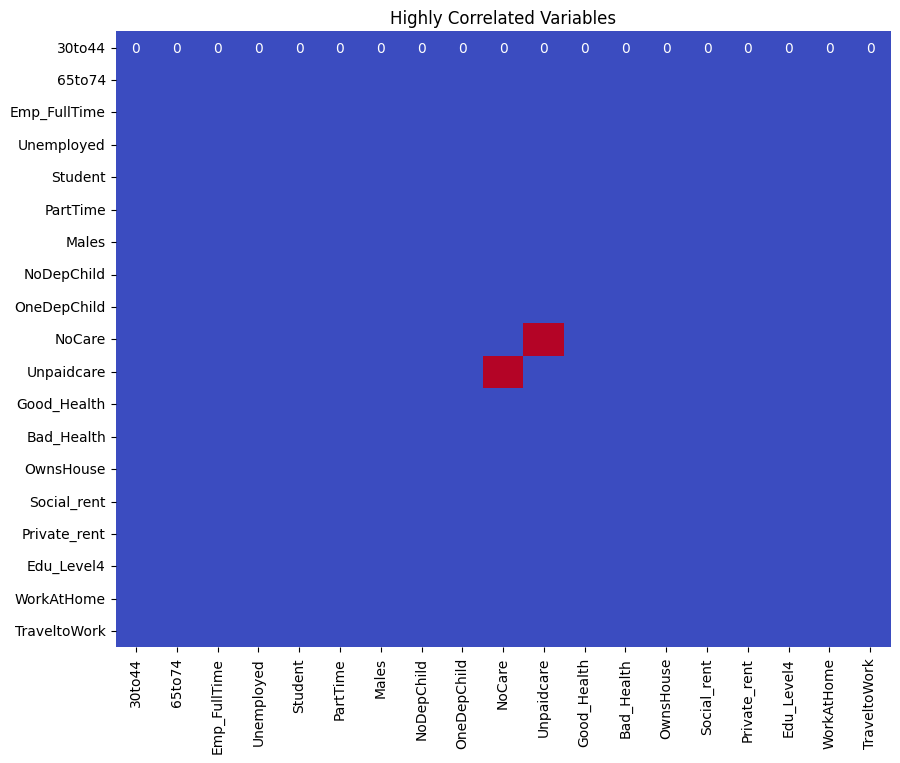

In [56]:
threshold = 0.75 

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

At a correlation level of 0.8, there were no variables to reduce, so I checked collinearity at a Pearson's coefficient level of 0.75 and there were two variables that were associated with each other. That was 'NoCare' and 'Unpaidcare'. This makes sense, as if you do not do any hours of unpaid care a week, then you are unlikely to do 1-19 hours of unpaid care a week. For this reason, I am going to remove the 'NoCare' variable.

In [57]:
z_score_df.drop(['NoCare'], axis=1, inplace=True)
z_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   30to44        4306 non-null   float64
 1   65to74        4095 non-null   float64
 2   Emp_FullTime  4312 non-null   float64
 3   Unemployed    3769 non-null   float64
 4   Student       3829 non-null   float64
 5   PartTime      4305 non-null   float64
 6   Males         4320 non-null   float64
 7   NoDepChild    4321 non-null   float64
 8   OneDepChild   3538 non-null   float64
 9   Unpaidcare    4159 non-null   float64
 10  Good_Health   4320 non-null   float64
 11  Bad_Health    3701 non-null   float64
 12  OwnsHouse     4313 non-null   float64
 13  Social_rent   3035 non-null   float64
 14  Private_rent  4065 non-null   float64
 15  Edu_Level4    4319 non-null   float64
 16  WorkAtHome    4198 non-null   float64
 17  TraveltoWork  4280 non-null   float64
dtypes: float64(18)
memory usage:

Check again:

In [58]:
corr_2 = z_score_df.corr()

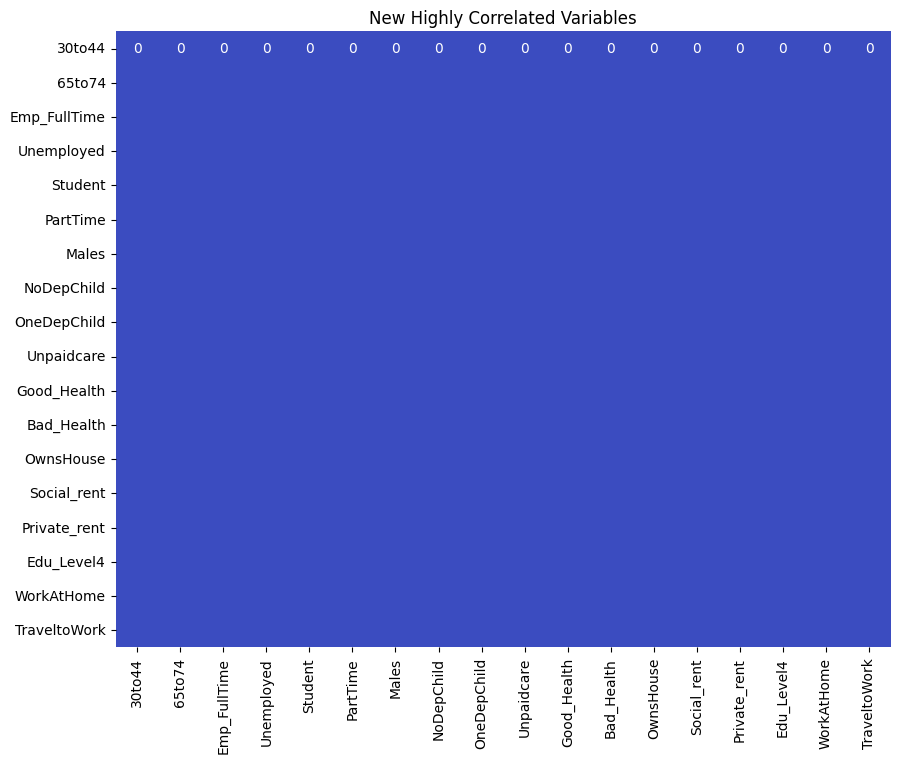

In [59]:
threshold = 0.75
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

There are no variables with a correlation above 0.75 pearson's correlation coefficient. So now I am going to check for NaN values and where there are NaN values, I am going to use a process called imputation. I am going to include the mean of the rest of the data as an estimation of each NaN value. 

In [64]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

The DataFrame does not contain NaN values.


In [61]:
z_score_df.fillna(z_score_df.mean(), inplace=True)

In [63]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

The DataFrame does not contain NaN values.


I have now added all my variables to the dataframe, standardised the results based on population size, standardised the results between different variables, checked and removed collinear variables, checked for NaN values and, where there are NaN values I have included a mean z-score of the DataFrame in place so that I can continue with my analysis. 

The next step will be to use k-means clustering algorithms to create a classification and find an optimal number of groups in each cluster.

7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?

I am first going to determine waht is the optimum number of clusters, and then use this value of clusters to create a classification based on the variables.

In [66]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

The following code is the 'elbow method' and determine what the sum of the squared distances are to teh centroid of each cluster. It is useful to help determine what the optimum number of clusters are. 

A low sum of squared distances indicates that the clusters are more homogenous, however having too many clusters would make it very hard to find differences between the clusters. So a balance is needed between enough clusters to determine differences, but not too many that it is hard to tell where there are differences. 

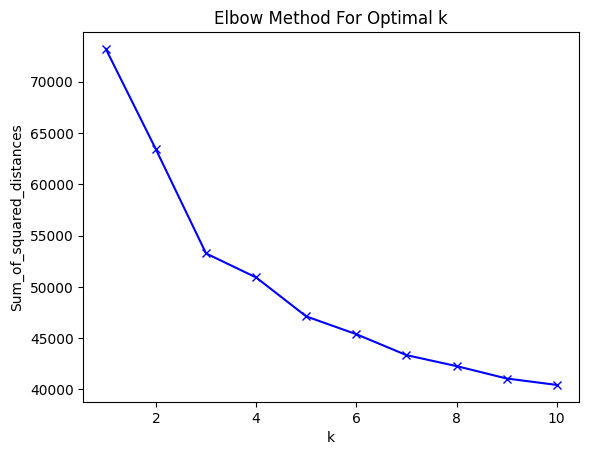

In [75]:
Sum_of_squared_distances = []

K_range = range(1,11)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this plot, it seems as though there are two bends in the plot, one at around k=3 and one at k=5. Therefore I am going to use a cluster value close to 5. 

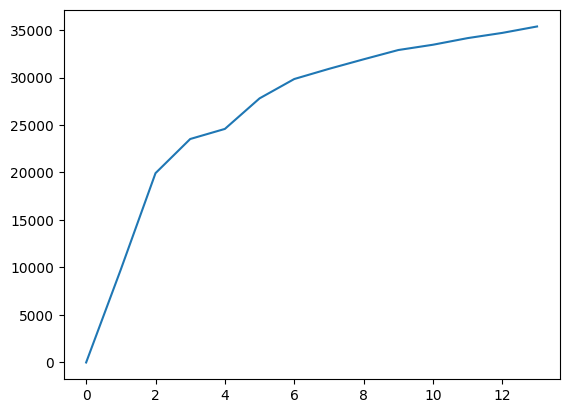

In [77]:
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

The previous code is useful as it can provide more information as to how many clusters to use. It shows an bend at around 4 clusters, suggesting that the addition of a 4th cluster does not impact the distinctiveness of the data compared to three clusters. This suggests to use 5 or 6 clusters. I will look at, and evaluate the clusters with 5 and 6 categories to see which is best to use.

To evaluate them, I will first look at the histograms and to see the distributions of each counts of each category. I will then evaluate the clusters graphically using Principal Component Analysis. 

KMeans with 5 clusters:

In [112]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [113]:
z_score_df.head()

30to44    65to74  Emp_FullTime    Unemployed       Student  PartTime  \
0 -1.082341  0.166806      0.611757 -3.399171e-01 -6.958828e-17  0.491800   
1  0.195322 -1.236612      0.312919 -2.644813e-01  4.480600e-01  0.383720   
2 -0.025254 -1.172664      0.011290  1.642727e-02  2.285081e+00 -0.526011   
3 -0.295765  0.386805     -0.471920 -1.036876e-17  3.082476e-01  0.602516   
4 -0.775216  1.751094     -1.488102 -4.366012e-02 -2.001608e-01 -0.418533   

      Males  NoDepChild   OneDepChild    Unpaidcare  Good_Health  \
0  0.628442    0.224749 -8.828308e-01  2.286303e-01    -0.479805   
1 -0.496565    2.010205  2.891977e-16  5.899551e-01    -1.212030   
2  0.488115    1.095940  1.385946e+00 -1.264250e-16    -0.490862   
3  1.077593   -0.610143 -4.152789e-01  1.483142e+00    -2.178425   
4 -0.650811   -0.483244  2.891977e-16  8.995157e-01    -1.712077   

     Bad_Health  OwnsHouse   Social_rent  Private_rent  Edu_Level4  \
0  6.453347e-01   0.439087 -1.343632e-01     -0.899049   -1.242003   
1  2.627071e-01  -0.600661 -6.324441e-01      1.208857    0.943812   
2 -7.295494e-17  -0.751667  6.204080e-17      1.395779    0.833804   
3 -7.140450e-01  -0.321020 -8.284481e-01      0.305400   -0.061980   
4  3.524226e-01  -1.150994  1.647659e+00     -1.011777    0.161530   

   WorkAtHome  TraveltoWork  Cluster  
0   -0.196057      0.463610        2  
1   -0.462252     -0.867949        4  
2   -0.641514     -0.998241        3  
3    2.117659     -0.167716        0  
4    0.644861      1.977545        0

Checking the histogram to see the distribution of counts in each group:

(array([1018.,    0.,  629.,    0.,    0., 1222.,    0.,  426.,    0.,
        1027.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

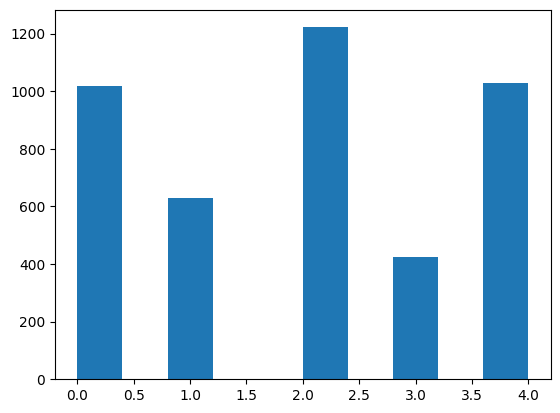

In [114]:
plt.hist(z_score_df['Cluster'])

There are some differences in the sizes of groups, notably the groups 1 and 3 are smaller than the other 3 categories. 

I am now going to run the PCA analysis and determine the variane explained by components in the PCA analysis. The PCA analysis is a method of representing how the different 

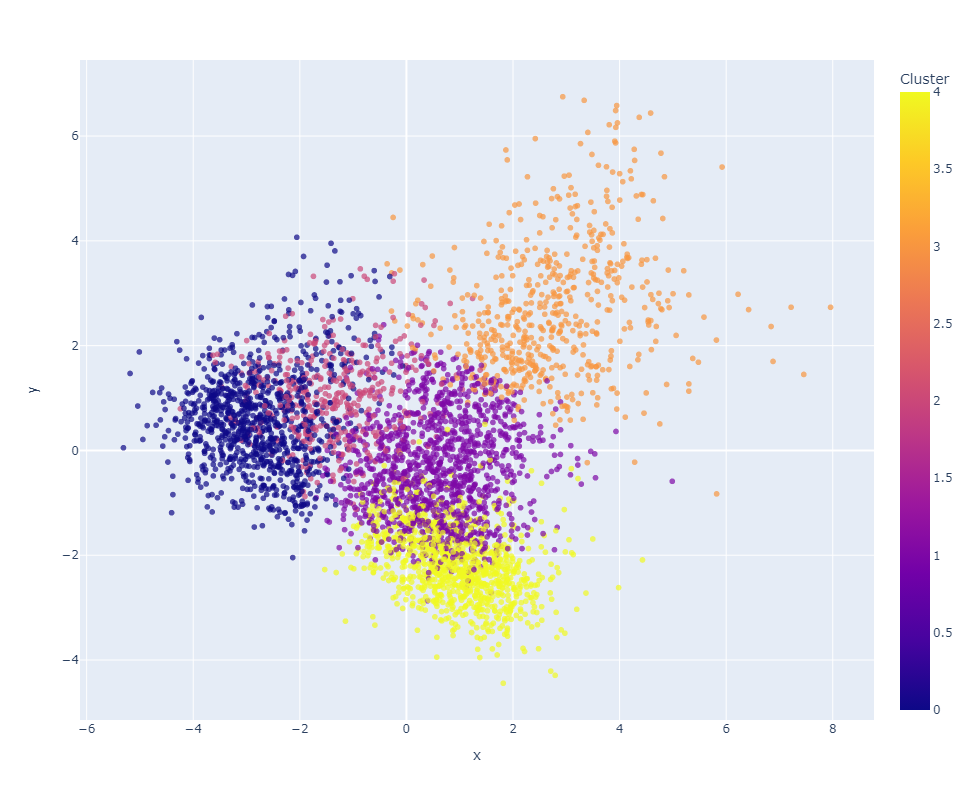

These two components explain 38.85% of the point variability.


<Figure size 1200x800 with 0 Axes>

In [115]:
# Code based on the example provided here: 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

THe plot shows that with 5 different categories, you can see the difference in the different categories well. Whilst there are some overlaps, it is clear that there are 5 different groups and with as many variables as are being used in this analysis, it is likely for there to be some overlap in the cells. 38.85% of the variance in the dataset is explained with this categorisation. Whilst this may seem like not much, there are lots of different variables so it is very hard to capture all of the variance in the data. 

The following code will now show the histogram distrubtion for 6 categories and PCA analysis. This will hopefully help determine how many categories should be used and reduce the bias that is present in geodemographic categorisation 

In [116]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [117]:
z_score_df.head()

30to44    65to74  Emp_FullTime    Unemployed       Student  PartTime  \
0 -1.082341  0.166806      0.611757 -3.399171e-01 -6.958828e-17  0.491800   
1  0.195322 -1.236612      0.312919 -2.644813e-01  4.480600e-01  0.383720   
2 -0.025254 -1.172664      0.011290  1.642727e-02  2.285081e+00 -0.526011   
3 -0.295765  0.386805     -0.471920 -1.036876e-17  3.082476e-01  0.602516   
4 -0.775216  1.751094     -1.488102 -4.366012e-02 -2.001608e-01 -0.418533   

      Males  NoDepChild   OneDepChild    Unpaidcare  Good_Health  \
0  0.628442    0.224749 -8.828308e-01  2.286303e-01    -0.479805   
1 -0.496565    2.010205  2.891977e-16  5.899551e-01    -1.212030   
2  0.488115    1.095940  1.385946e+00 -1.264250e-16    -0.490862   
3  1.077593   -0.610143 -4.152789e-01  1.483142e+00    -2.178425   
4 -0.650811   -0.483244  2.891977e-16  8.995157e-01    -1.712077   

     Bad_Health  OwnsHouse   Social_rent  Private_rent  Edu_Level4  \
0  6.453347e-01   0.439087 -1.343632e-01     -0.899049   -1.242003   
1  2.627071e-01  -0.600661 -6.324441e-01      1.208857    0.943812   
2 -7.295494e-17  -0.751667  6.204080e-17      1.395779    0.833804   
3 -7.140450e-01  -0.321020 -8.284481e-01      0.305400   -0.061980   
4  3.524226e-01  -1.150994  1.647659e+00     -1.011777    0.161530   

   WorkAtHome  TraveltoWork  Cluster  
0   -0.196057      0.463610        5  
1   -0.462252     -0.867949        3  
2   -0.641514     -0.998241        1  
3    2.117659     -0.167716        4  
4    0.644861      1.977545        4

(array([ 584.,    0.,  423.,    0.,  677.,    0., 1005.,    0., 1024.,
         609.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

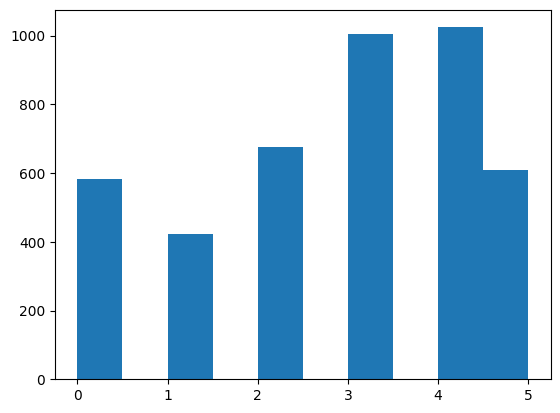

In [118]:
plt.hist(z_score_df['Cluster'])

This histogram also has 2 categories which have a larger number of countrs, and then 4 other categories with a similar number of counts. In my opinion the variation in number of counts per category looks as though it is smaller in using 6 categories than with 5. I will look now at the PCA analysis to see if there is any more variance explained and if the clusters can be seen clearly. 

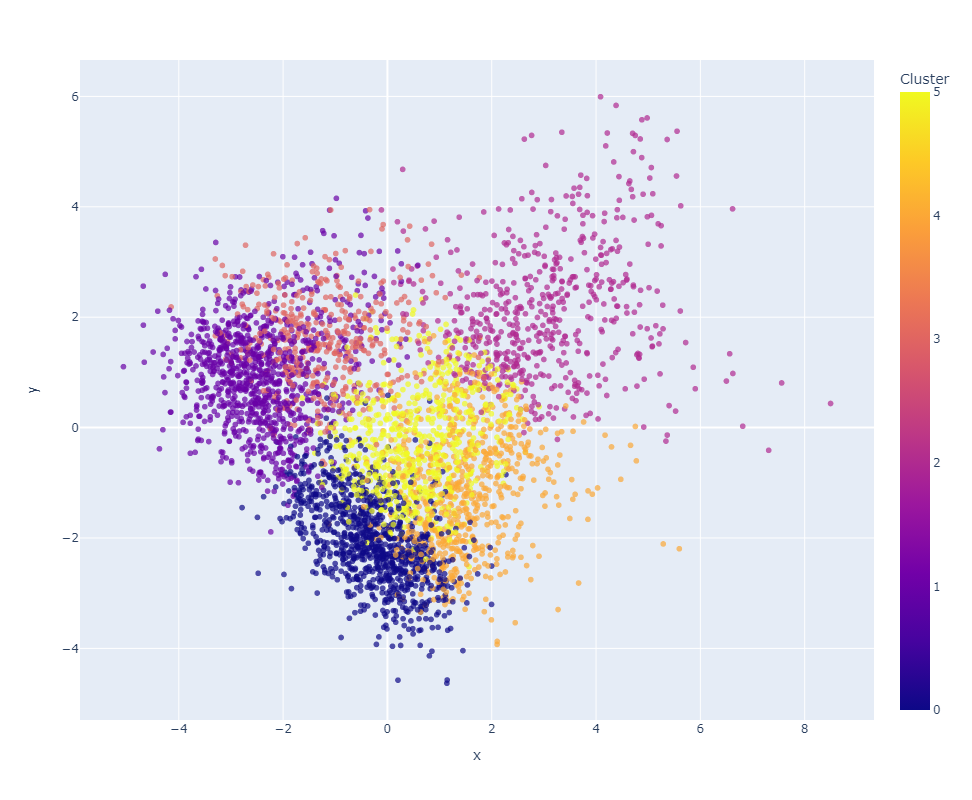

These two components explain 37.36% of the point variability.


<Figure size 1200x800 with 0 Axes>

In [119]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

The PCA analysis of 6 groups produces some interesting results. Whilst the histogram may have showed a bit better distribution, it seems to me as though the clusters are far less clear than when I used k=5. Many of the yellow and orange clusters overlap, and the purple and red clusters overlap quite significantly too. This is supported further as 37.36% of the point variability is explained by this PCA, whilst this is only a small decrease. This, combined with the visual clusters suggests that it is better to use k=5 KMeans classification. Even though the distribution of counts in the histograms is slightly worse, the categories seem clearer. 

Doing the KMeans with 5 clusters and adding that to the z_score_df dataframe. 

In [120]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [121]:
z_score_df.head()

30to44    65to74  Emp_FullTime    Unemployed       Student  PartTime  \
0 -1.082341  0.166806      0.611757 -3.399171e-01 -6.958828e-17  0.491800   
1  0.195322 -1.236612      0.312919 -2.644813e-01  4.480600e-01  0.383720   
2 -0.025254 -1.172664      0.011290  1.642727e-02  2.285081e+00 -0.526011   
3 -0.295765  0.386805     -0.471920 -1.036876e-17  3.082476e-01  0.602516   
4 -0.775216  1.751094     -1.488102 -4.366012e-02 -2.001608e-01 -0.418533   

      Males  NoDepChild   OneDepChild    Unpaidcare  Good_Health  \
0  0.628442    0.224749 -8.828308e-01  2.286303e-01    -0.479805   
1 -0.496565    2.010205  2.891977e-16  5.899551e-01    -1.212030   
2  0.488115    1.095940  1.385946e+00 -1.264250e-16    -0.490862   
3  1.077593   -0.610143 -4.152789e-01  1.483142e+00    -2.178425   
4 -0.650811   -0.483244  2.891977e-16  8.995157e-01    -1.712077   

     Bad_Health  OwnsHouse   Social_rent  Private_rent  Edu_Level4  \
0  6.453347e-01   0.439087 -1.343632e-01     -0.899049   -1.242003   
1  2.627071e-01  -0.600661 -6.324441e-01      1.208857    0.943812   
2 -7.295494e-17  -0.751667  6.204080e-17      1.395779    0.833804   
3 -7.140450e-01  -0.321020 -8.284481e-01      0.305400   -0.061980   
4  3.524226e-01  -1.150994  1.647659e+00     -1.011777    0.161530   

   WorkAtHome  TraveltoWork  Cluster  
0   -0.196057      0.463610        1  
1   -0.462252     -0.867949        3  
2   -0.641514     -0.998241        4  
3    2.117659     -0.167716        0  
4    0.644861      1.977545        0

I am now going to map the cluster centres, this will give me a good indication of the different characteristics that are in each category. Then I can try and define what each category may be. 

In [136]:
# KMeans clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

# Create a new DataFrame with cluster assignments and column names
#result_df = pd.DataFrame({'Cluster': clusters, 'Column': z_score_df.columns})

cluster_centers.head()

30to44    65to74  Emp_FullTime  Unemployed   Student  PartTime     Males  \
0 -0.578895  0.469193     -0.196038   -0.441737 -0.356748  0.040320 -0.114622   
1  1.217541 -0.601166      1.116303   -0.105671  0.060908 -0.797325  0.425612   
2 -0.116583 -0.004819     -1.002590    1.351705 -0.232081  0.956477  0.019237   
3 -0.416539 -0.711509     -0.862350   -0.285457  2.034736 -0.211413  0.196306   
4 -0.305309  0.337706      0.029555   -0.101877 -0.330407  0.218126 -0.315568   

   NoDepChild  OneDepChild  Unpaidcare  Good_Health  Bad_Health  OwnsHouse  \
0   -0.119514    -0.491862    0.884041    -0.490922   -0.386092   1.016233   
1    0.656094     0.293735   -0.339577     0.025374   -0.260009  -0.373010   
2   -0.867201     0.486246   -0.478391     0.258765    1.166114  -1.378399   
3    0.350802     0.195192   -0.571286    -0.434152   -0.329642  -0.905696   
4   -0.133080    -0.132656   -0.018506     0.387862    0.075102   0.429526   

   Social_rent  Private_rent  Edu_Level4  WorkAtHome  TraveltoWork   Cluster  
0    -0.284433     -0.587030    0.653612    0.481379      0.163648  0.055500  
1    -0.345325      0.912332    0.834697   -0.276110     -0.543138  2.993035  
2     1.635939     -0.604966   -1.204566    0.266448      0.115555  1.991597  
3    -0.279780      1.534335    0.384450    0.114357     -0.670822  4.000000  
4    -0.171228     -0.477256   -0.732859   -0.322144      0.462689  1.000000

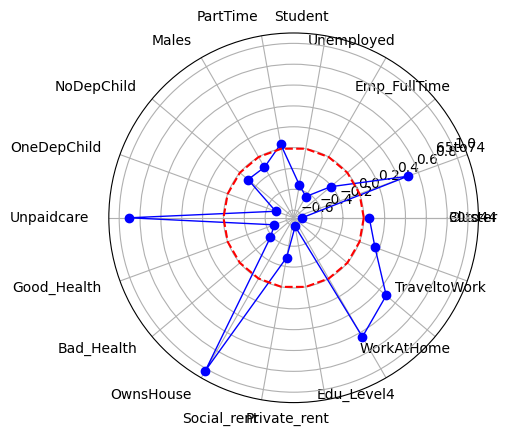

In [129]:
first_row_centers = cluster_centers.iloc[1, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()
#Ignore the cluster polar values, and focus in he census variables.